In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

### Load data from CSV file

In [4]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\data sets\parkinson_disease_detection\Parkinsson disease.csv")

In [5]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
# shape
data.shape

(195, 24)

### EDA

In [7]:
# column names
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
# Description about data : 

#name - represents recording number
#MDVP:Fo(Hz) - MDVP(multidimensional voice program) Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
#MDVP:Shimmer, MDVP:Shimmer(dB) ,Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - Several measures of variation in amplitude  
#NHR ,HNR - Two measures of ratio of noise to tonal components in the voice  
#status - column 0 represntes for healthy and 1 represents for PD(Parkinson's disease)
#RPDE ,D2 - Two nonlinear dynamical complexity measures 
#DFA - Signal fractal scaling exponent
#spread1 ,spread2, PPE  - Three nonlinear measures of fundamental frequency variation

In [9]:
data.info()
# aim is to distinguish between healthy and PD pateints according to 'status' column
# in 'status' column, 0 represents for healthy and 1 for PD.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
# missing values
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
# describing the relation between numerical values
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
data.status.value_counts()
#by value_counts we can clearly see that output column is imbalance.

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

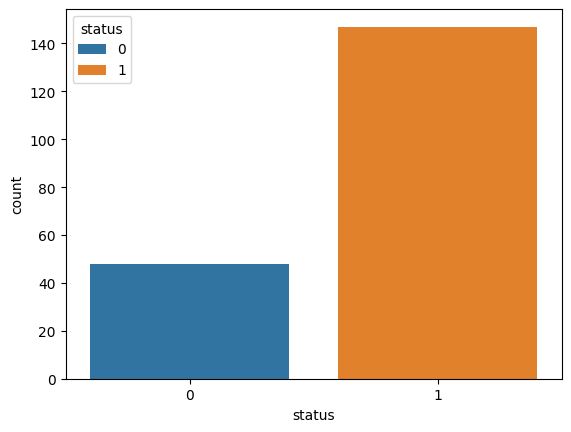

In [13]:
# visualize the outcome
sb.countplot(data=data , x='status', hue='status')

### Data preprocessing and selection

In [14]:
#There is no impact of 'name'column on 'status'(o/p) so i droped that.
data.drop(columns=['name'],axis=0,inplace=True)

In [15]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [16]:
#splitting the data
x = data.drop(columns=['status','MDVP:Fhi(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)'
              ,'Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA','NHR','RPDE','DFA','D2'],axis=1)  # i/p
y = data[['status']]            # 0/p

#### Train or Test dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

#### Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest

In [20]:
# SelectKBest was applied to select the eight best features of the dataset.
k_best = SelectKBest(k=8)

In [21]:
k_best_fit = k_best.fit(x,y)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
k_best_fit

SelectKBest(k=8)

In [23]:
# eight selected features  
x.columns[k_best_fit.get_support()]

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:APQ', 'HNR',
       'spread1', 'spread2', 'PPE'],
      dtype='object')

#### Feature Scaling

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Scaling
trf1 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,22))])

In [26]:
trf1

ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 22, None))])

###### Here i have applied different algorithms for accuracy prediction

In [27]:
# train the model 
#Algorithm1
from sklearn.tree import DecisionTreeClassifier
trf2 = DecisionTreeClassifier()

In [28]:
trf2

DecisionTreeClassifier()

In [29]:
#Algorithm2
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr

LogisticRegression()

In [32]:
#Algorithm3
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier()

In [34]:
rfc

RandomForestClassifier()

### Pipeline

In [35]:
#creating pipeline
from sklearn.pipeline import Pipeline,make_pipeline

In [36]:
pipe = make_pipeline(trf1,trf2)

In [37]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 22, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [38]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 22, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [39]:
# Predict
y_pred = pipe.predict(xtest)

In [40]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

### Evaluation

In [41]:
#accuracy (from decisiontreeclassifier)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.8813559322033898

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.89      0.95      0.92        43

    accuracy                           0.88        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.88      0.88      0.88        59



## balancing data

In [44]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
RandomOverSampler = RandomOverSampler(random_state=42)

In [46]:
RandomOverSampler

RandomOverSampler(random_state=42)

In [47]:
x_resampled,y_resampled = RandomOverSampler.fit_resample(x,y)

In [48]:
#after balancing the data splitting it again
xtr,xte,ytr,yte = train_test_split(x_resampled,y_resampled,test_size=0.3)

In [49]:
xtr

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:APQ,HNR,spread1,spread2,PPE
284,209.516,89.488,0.02751,0.01879,19.147,-6.195325,0.129303,0.168895
81,95.605,87.549,0.03156,0.02190,19.659,-5.132032,0.210458,0.260633
169,240.301,219.783,0.02018,0.01344,21.020,-7.169701,0.073298,0.100881
214,174.188,94.261,0.04087,0.02745,19.517,-6.538586,0.121952,0.133050
247,237.226,225.227,0.01752,0.01133,22.736,-7.310550,0.098648,0.095032
...,...,...,...,...,...,...,...,...
57,117.274,110.402,0.02293,0.01948,22.817,-4.608260,0.290024,0.314464
261,240.301,219.783,0.02018,0.01344,21.020,-7.169701,0.073298,0.100881
56,110.417,103.370,0.03715,0.02802,21.422,-4.438453,0.238298,0.335041
125,145.174,80.637,0.02362,0.01944,18.857,-5.594275,0.127950,0.222716


In [50]:
#to display all columns from dataset
pd.set_option("display.max_columns", None)

In [51]:
xtr.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:APQ,HNR,spread1,spread2,PPE
284,209.516,89.488,0.02751,0.01879,19.147,-6.195325,0.129303,0.168895
81,95.605,87.549,0.03156,0.02190,19.659,-5.132032,0.210458,0.260633
169,240.301,219.783,0.02018,0.01344,21.020,-7.169701,0.073298,0.100881
214,174.188,94.261,0.04087,0.02745,19.517,-6.538586,0.121952,0.133050
247,237.226,225.227,0.01752,0.01133,22.736,-7.310550,0.098648,0.095032


In [52]:
pipe.fit(xtr,ytr)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 22, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [53]:
# Predict
y_pred = pipe.predict(xte)

In [54]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0], dtype=int64)

##### accuracy after balancing the data

In [55]:
accuracy_score(yte,y_pred)

0.9213483146067416

In [56]:
print(classification_report(yte,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        42
           1       1.00      0.85      0.92        47

    accuracy                           0.92        89
   macro avg       0.93      0.93      0.92        89
weighted avg       0.93      0.92      0.92        89



In [57]:
#shape of imbalanced data
x.shape,y.shape

((195, 8), (195, 1))

In [58]:
#shape of balanced data
x_resampled.shape,y_resampled.shape

((294, 8), (294, 1))

In [59]:
y_resampled[y_resampled['status']==1]

,status
0,1
1,1
2,1
3,1
4,1
...,...
178,1
179,1
180,1
181,1


In [60]:
y_resampled[y_resampled['status']==0]

,status
30,0
31,0
32,0
33,0
34,0
...,...
289,0
290,0
291,0
292,0


### Pickle the Model

In [61]:
# This module lets us save our models once we fit them.
import pickle

In [62]:
# Pickle the model
pickle.dump(pipe,open('parkinsons.pkl','wb'))

In [63]:
# Open pickled model
f = open('parkinsons.pkl','rb')
f1 = pickle.load(f)